# Model - CNN1

In [1]:
import keras.layers
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16

# Create an ImageDataGenerator for training, validation, and test datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    '../data/splitted/train',
    target_size=(60, 60),
    batch_size=batch_size,
    class_mode='categorical'  # Automatically one-hot encodes the labels
)

# Load validation data
validation_generator = val_datagen.flow_from_directory(
    '../data/splitted/val',
    target_size=(60, 60),
    batch_size=batch_size,
    class_mode='categorical'  # Automatically one-hot encodes the labels
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    '../data/splitted/test',
    target_size=(60, 60),
    batch_size=batch_size,
    class_mode='categorical',  # Automatically one-hot encodes the labels
    shuffle=False               # Do not shuffle for evaluation
)

# Get a batch of training data
x_batch, y_batch = next(train_generator)

# Print the shape of the labels
print("Shape of x_batch:", x_batch.shape)  

# Print the shape of the labels
print("Shape of y_batch:", y_batch.shape)  # batch_size, number_of_classes

# Print the first label in one-hot encoded format
print("First label (one-hot encoded):", y_batch[0])

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(60,60,3)),
    layers.Conv2D(32, (5, 5), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3),activation='relu'),
    layers.Conv2D(128, (3, 3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(256, (3, 3),activation='relu'),
    layers.Conv2D(256, (3, 3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100  # Adjust number of epochs as needed
)

model.save('CNN1_e100_mypc.h5')

print("Model and weights saved.")

Found 14342 images belonging to 50 classes.
Found 4082 images belonging to 50 classes.
Found 2098 images belonging to 50 classes.
Shape of x_batch: (16, 60, 60, 3)
Shape of y_batch: (16, 50)
First label (one-hot encoded): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


d:\bangla-alphabet-recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\bangla-alphabet-recognition\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 254s 280ms/step - accuracy: 0.0877 - loss: 3.7380 - val_accuracy: 0.3395 - val_loss: 2.3983
Epoch 2/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 247s 276ms/step - accuracy: 0.3181 - loss: 2.4657 - val_accuracy: 0.5426 - val_loss: 1.5759
Epoch 3/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 232s 258ms/step - accuracy: 0.4770 - loss: 1.7671 - val_accuracy: 0.6832 - val_loss: 1.0178
Epoch 4/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 170s 189ms/step - accuracy: 0.6114 - loss: 1.2892 - val_accuracy: 0.6668 - val_loss: 1.0929
Epoch 5/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 129s 144ms/step - accuracy: 0.6769 - loss: 1.0339 - val_accuracy: 0.7227 - val_loss: 0.9036
Epoch 6/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 130s 145ms/step - accuracy: 0.7149 - loss: 0.9156 - val_accuracy: 0.8106 - val_loss: 0.6009
Epoch 7/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 135s 151ms/step - accuracy: 0.7574 - loss: 0.7612 - val_accuracy: 0.8354 - val_loss: 0.5317
Epoch 8/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 174s 194ms/step - accuracy: 

Model and weights saved.


# Test Accuracy

In [2]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - accuracy: 0.9077 - loss: 0.5633
Test Loss: 0.524516224861145, Test Accuracy: 0.9094375371932983


# Accuracy Graph

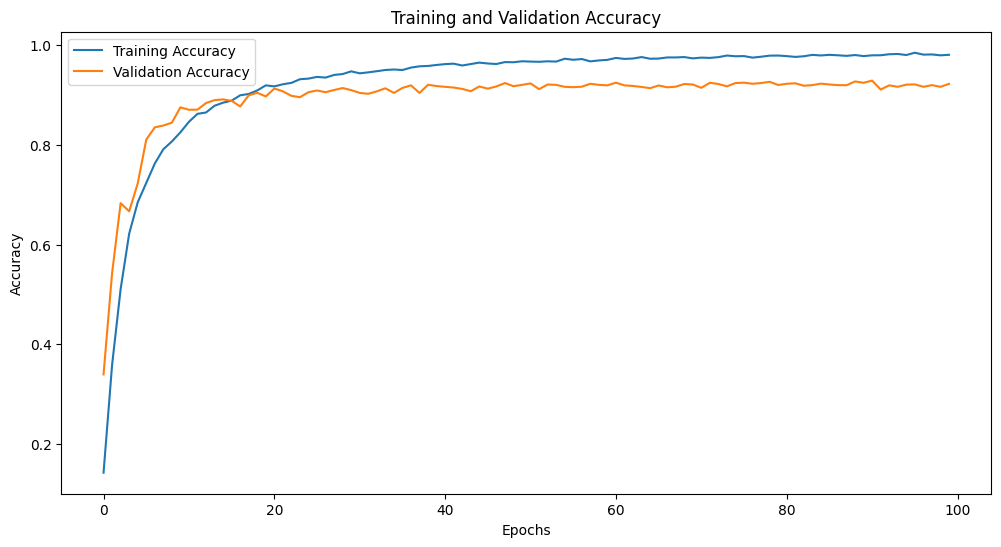

132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9077 - loss: 0.5633
Test Loss: 0.524516224861145, Test Accuracy: 0.9094375371932983


In [3]:
import matplotlib.pyplot as plt

# Plotting the accuracy graph for train and validation sets
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Model Summary

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 56, 56, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 52, 52, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 52, 52, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 22, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,216,632 (16.09 MB)

 Trainable params: 1,405,266 (5.36 MB)

 Non-trainable params: 832 (3.25 KB)

 Optimizer params: 2,810,534 (10.72 MB)